In [4]:
# Importing Standard libraries for data manipulation and visualization.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
df = pd.read_csv("../data/processed/heart.csv")

In [6]:
# Quick look
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (967, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [7]:
# 1. Check for Missing Values
print("Missing Values per Column:")
print(df.isnull().sum())

# 2. Check for Duplicates
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows: ", duplicates)

Missing Values per Column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Number of Duplicate Rows:  0


C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\3087046282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='condition', data=df, palette='coolwarm')


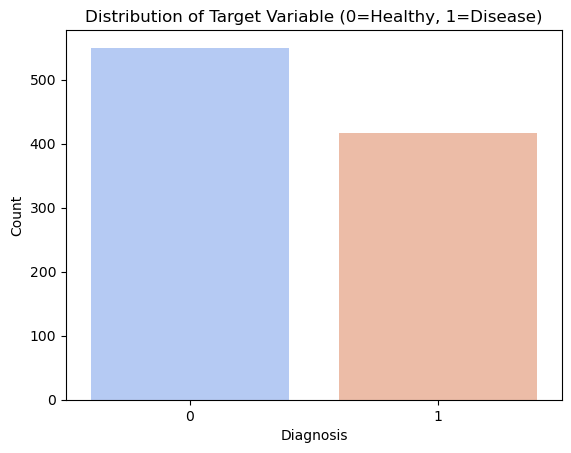

condition
0    56.876939
1    43.123061
Name: proportion, dtype: float64


In [8]:
# Visualize the ratio of Healthy (0) vs. Heart Disease (1)
sns.countplot(x='condition', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (0=Healthy, 1=Disease)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# Calculate exact percentages
print(df["condition"].value_counts(normalize=True) * 100)

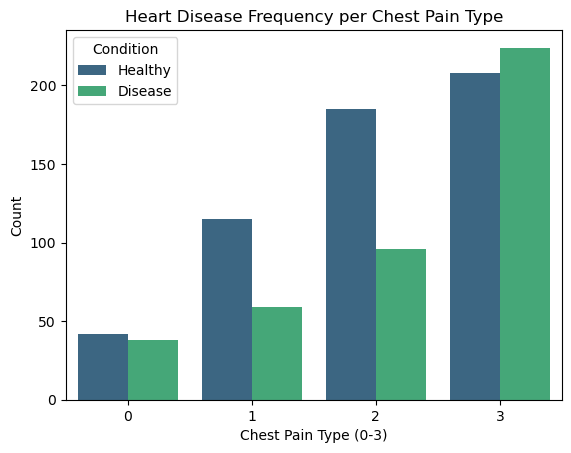

In [11]:
# Chest Pain types: 0=Asymptomatic, 1=Atypical, 2=Non-anginal, 3=Typical
sns.countplot(x = "cp", hue = "condition", data = df, palette = "viridis")
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.legend(title='Condition', labels=['Healthy', 'Disease'])
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\589968587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='chol', data=df, palette='Set2')


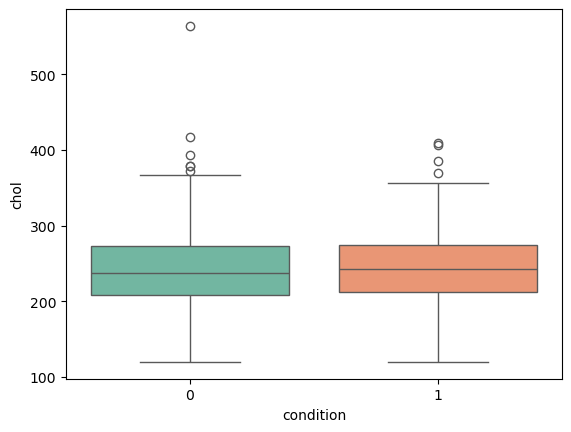

In [12]:
# Boxplot for Cholesterol
sns.boxplot(x='condition', y='chol', data=df, palette='Set2')

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\4131467802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='thalach', data=df, palette='Set2')


<Axes: xlabel='condition', ylabel='thalach'>

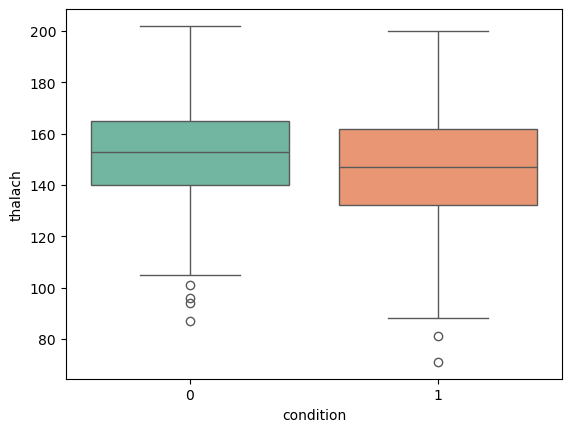

In [13]:
# Boxplot for Max Heart Rate
sns.boxplot(x='condition', y='thalach', data=df, palette='Set2')

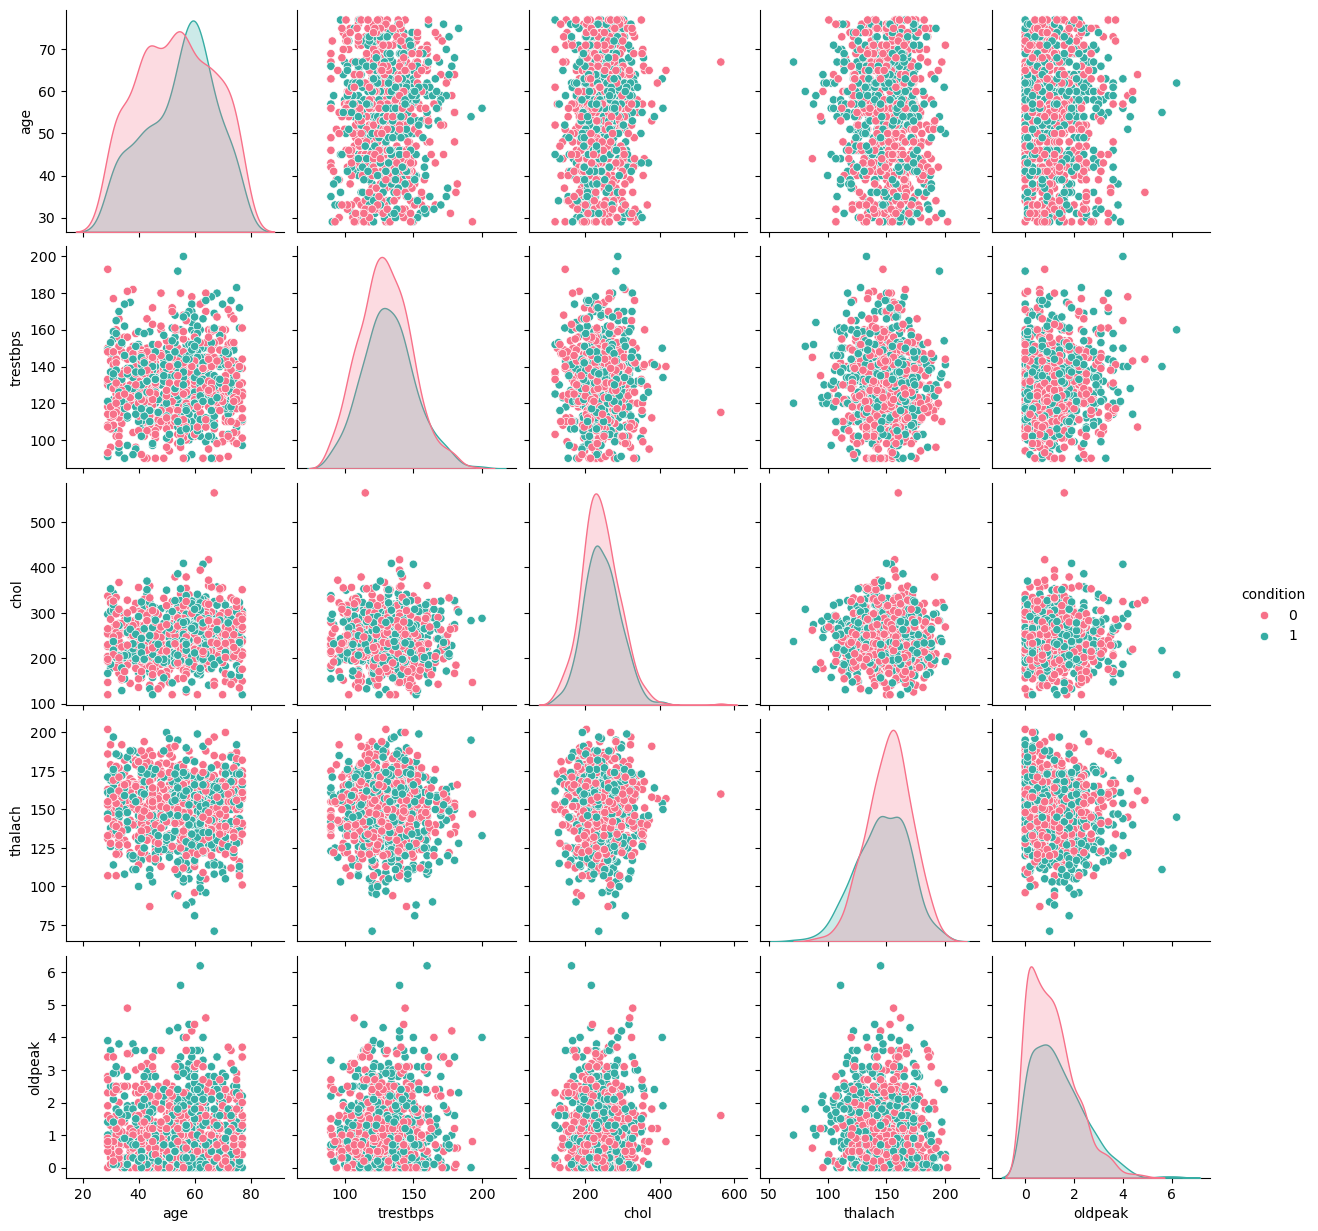

In [14]:
# Select a subset of interesting features to avoid a messy plot
cols_to_plot = ["age", "trestbps", "chol", "thalach", "oldpeak", "condition"]

# Plot
sns.pairplot(df[cols_to_plot], hue = "condition", palette = "husl", diag_kind = "kde")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\1040026382.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['age'], shade=True, color='blue', ax=axes[0])
C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\1040026382.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['chol'], shade=True, color='green', ax=axes[1])
C:\Users\Dell\AppData\Local\Temp\ipykernel_20368\1040026382.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['oldpeak'], shade=True, color='red', ax=axes[2])


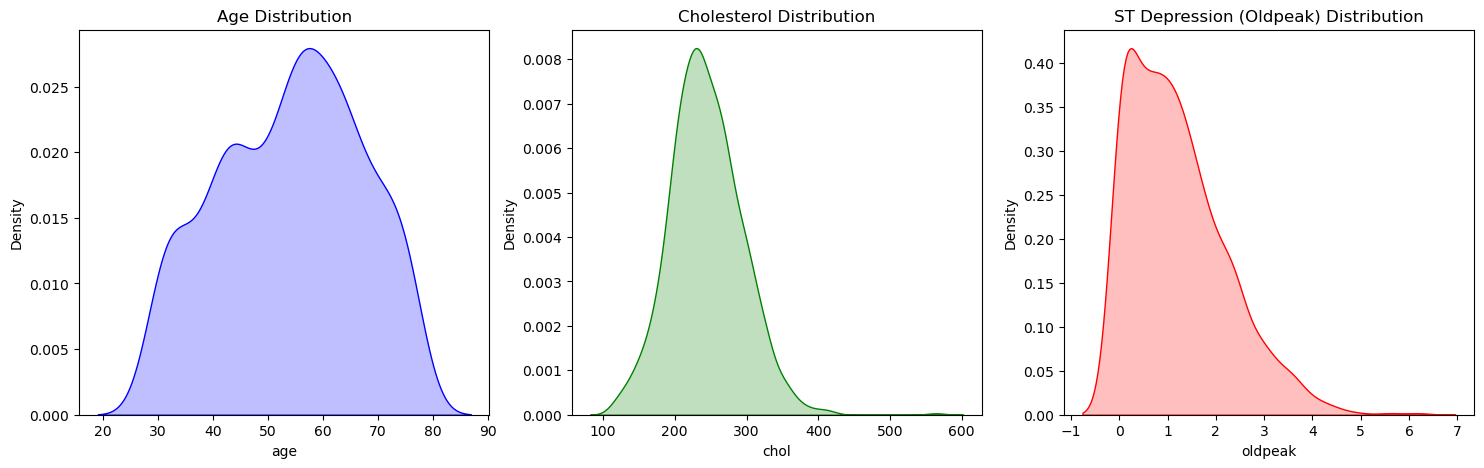

Oldpeak Skewness: 0.975435854505062


In [15]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distributions (KDE - Kernel Density Estimate)
sns.kdeplot(df['age'], shade=True, color='blue', ax=axes[0])
axes[0].set_title('Age Distribution')

sns.kdeplot(df['chol'], shade=True, color='green', ax=axes[1])
axes[1].set_title('Cholesterol Distribution')

sns.kdeplot(df['oldpeak'], shade=True, color='red', ax=axes[2])
axes[2].set_title('ST Depression (Oldpeak) Distribution')

plt.show()

print(f"Oldpeak Skewness: {df['oldpeak'].skew()}")

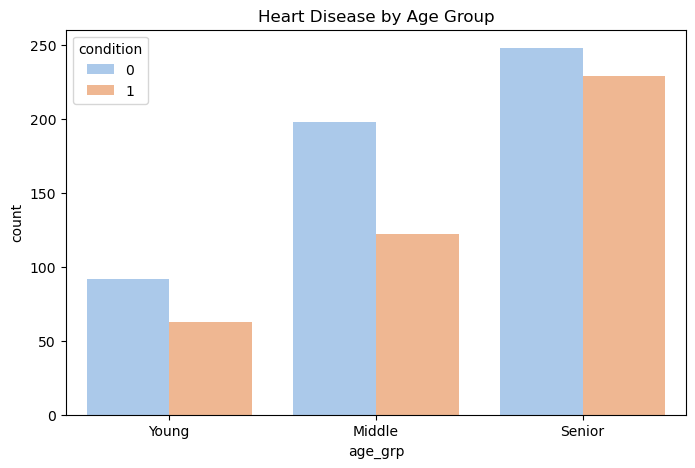

In [16]:
# Create temporary Age Bins
df['age_grp'] = pd.cut(df['age'], bins=[29, 40, 55, 77], labels=['Young', 'Middle', 'Senior'])

# Plot
plt.figure(figsize=(8,5))
sns.countplot(x='age_grp', hue='condition', data=df, palette='pastel')
plt.title('Heart Disease by Age Group')
plt.show()